In [1]:
from IPython.display import Video, Image
import yaml
import numpy as np
from animate import animate
from utils import load_image_video_pair, save_video, load_models_direct

model = 'vox' # make sure vox-cpk.pth.tar is in checkpoints
source_image_file = 'example/source.png'
driving_video_file = 'example/driving.mp4'
output = 'example/output.jupyter_example.mp4'
batch_size = 4
relative = True
adapt_movement_scale = False
frames = 32 # first 32 frames, set to -1 for all

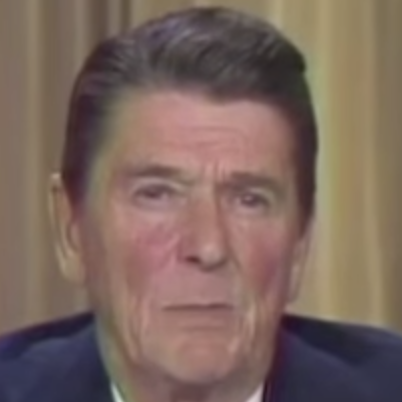

In [2]:
Image(source_image_file)

In [3]:
Video(driving_video_file)

In [4]:
config_path = f"config/{model}-256.yaml"
with open(config_path) as f:
    config = yaml.load(f, Loader=yaml.Loader)
frame_shape = config['dataset_params']['frame_shape']
num_channels = config['model_params']['common_params']['num_channels']
source_image, frames, fps = load_image_video_pair(source_image_file, 
                                                  driving_video_file,
                                                  frames=frames, 
                                                  frame_shape=frame_shape, 
                                                  num_channels=num_channels)
kp_detector, process_kp_driving, generator, _ = load_models_direct(model, prediction_only=True) 

In [5]:
predictions, _ = animate(source_image, frames, generator, kp_detector, process_kp_driving, 
                            relative, relative, adapt_movement_scale,
                            batch_size=batch_size)
save_video(output, predictions, fps=fps)

100%|██████████| 8/8 [00:56<00:00,  7.07s/it]


In [6]:
Video(output)